### Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path
file_path = "Coffee Shop Sales.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display basic information about dataset
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


### Data Cleaning & Preprocessing

In [2]:
# Drop missing values
df.dropna(inplace=True)

In [3]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [4]:
# Convert date and time to appropriate formats
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

# Convert numeric columns to appropriate types
df['transaction_qty'] = df['transaction_qty'].astype(int)
df['unit_price'] = df['unit_price'].astype(float)

In [5]:
# Handling outliers in unit_price using the IQR method
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['unit_price'] >= lower_bound) & (df['unit_price'] <= upper_bound)]

In [6]:
# Check the data types to confirm correct conversions
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int32
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

### Exploratory Data Analysis (EDA)

In [7]:
# Display summary statistics for numeric columns
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,144904.000000,144904.000000,144904.000000,144904.000000,144904.000000
mean,74720.941340,1.450298,5.337561,48.626774,3.026522
std,43154.332387,0.541903,2.074954,17.035893,0.818528
min,1.000000,1.000000,3.000000,22.000000,0.800000
25%,37253.750000,1.000000,3.000000,34.000000,2.500000
50%,74823.500000,1.000000,5.000000,47.000000,3.000000
75%,112080.250000,2.000000,8.000000,60.000000,3.500000
max,149456.000000,4.000000,8.000000,87.000000,4.750000


### What Time of the Day Do People Drink Coffee the Most?

Coffee Sales by Hour:
hour
6      2588
7      7796
8     10145
9     10221
10    10898
11     5995
12     5376
13     5499
14     5489
15     5540
16     5645
17     5466
18     4770
19     3508
20      314
Name: transaction_qty, dtype: int32


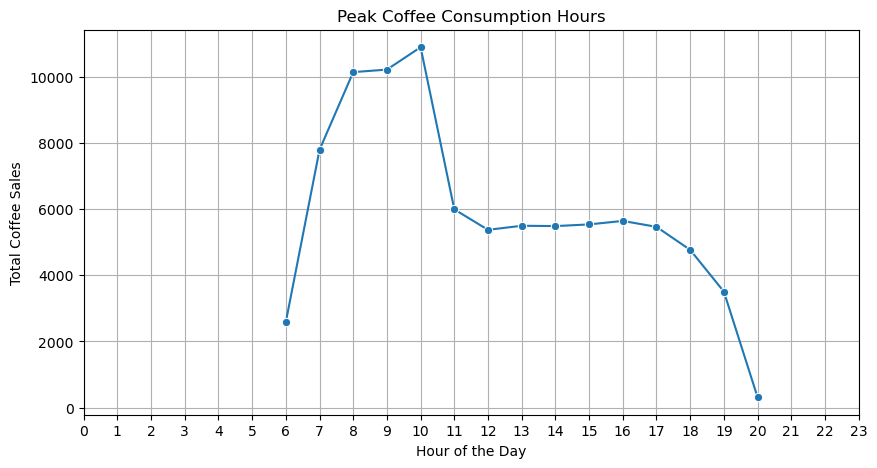

In [23]:
# Extract hour from transaction_time
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

# Filter only coffee sales
coffee_df = df[df['product_category'].str.lower() == "coffee"]

# Aggregate total coffee sales by hour
sales_by_hour = coffee_df.groupby('hour')['transaction_qty'].sum()

# Print summary
print("Coffee Sales by Hour:")
print(sales_by_hour)

# Plot sales by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Coffee Sales")
plt.title("Peak Coffee Consumption Hours")
plt.xticks(range(0, 24))  # Ensure all hours are represented
plt.grid(True)
plt.savefig("coffee_sales_by_hour.png")
plt.show()

### What is the Average Sales Per Transaction?

Average Sales Per Transaction: 1.45


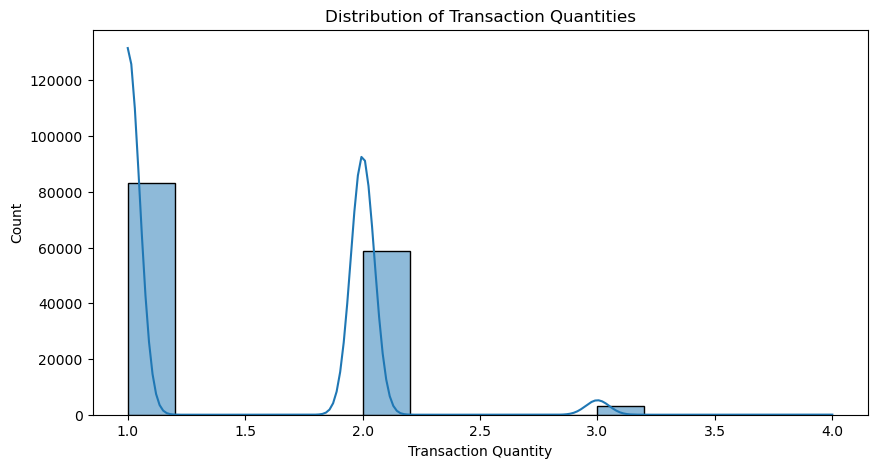

In [19]:
# Calculate average sales per transaction
avg_sales_per_transaction = df['transaction_qty'].mean()

print(f"Average Sales Per Transaction: {avg_sales_per_transaction:.2f}")

# Visualizing the distribution of transaction quantities
plt.figure(figsize=(10, 5))
sns.histplot(df['transaction_qty'], bins=15, kde=True)
plt.xlabel("Transaction Quantity")
plt.ylabel("Count")
plt.title("Distribution of Transaction Quantities")
plt.savefig("transaction_quantity_distribution.png")
plt.show()

### Which Day of the Week Has the Highest Sales?

Sales by Day of the Week:
day_of_week
Monday       30652
Tuesday      29808
Wednesday    29980
Thursday     30580
Friday       30570
Saturday     29021
Sunday       29543
Name: transaction_qty, dtype: int32


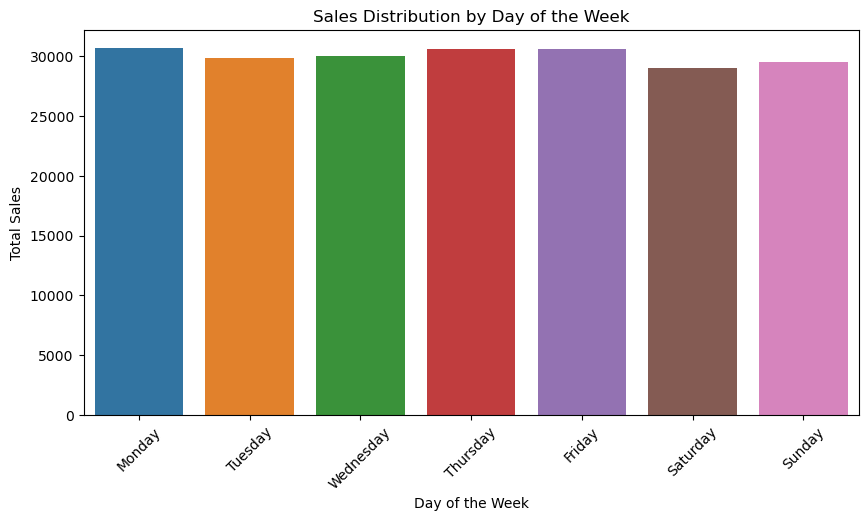

In [20]:
# Extract day of the week from transaction_date
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Aggregate total sales by day of the week
sales_by_day = df.groupby('day_of_week')['transaction_qty'].sum()

# Order days correctly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day.reindex(day_order)

# Print summary
print("Sales by Day of the Week:")
print(sales_by_day)

# Plot the sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Day of the Week")
plt.xticks(rotation=45)
plt.savefig("sales_by_day_of_week.png")
plt.show()

### Which Month Has the Highest Sales?

Sales from January to June:
month
January     24336
February    23093
March       29806
April       35721
May         47294
June        49904
Name: transaction_qty, dtype: int32


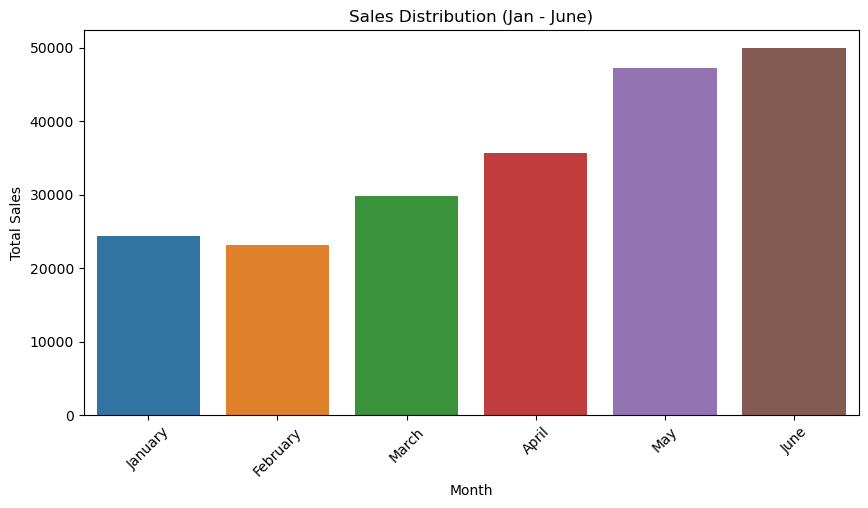

In [22]:
# Extract the month from transaction_date
df['month'] = df['transaction_date'].dt.month_name()

# Filter data from January to June
months_to_keep = ["January", "February", "March", "April", "May", "June"]
df_filtered = df[df['month'].isin(months_to_keep)]

# Aggregate total sales by month (only Jan - June)
sales_by_month = df_filtered.groupby('month')['transaction_qty'].sum()

# Ensure correct order of months
month_order = ["January", "February", "March", "April", "May", "June"]
sales_by_month = sales_by_month.reindex(month_order)

# Print summary
print("Sales from January to June:")
print(sales_by_month)

# Plot the sales from January to June
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Distribution (Jan - June)")
plt.xticks(rotation=45)
plt.savefig("sales_jan_to_june.png")
plt.show()

### Sales Trends Over Time

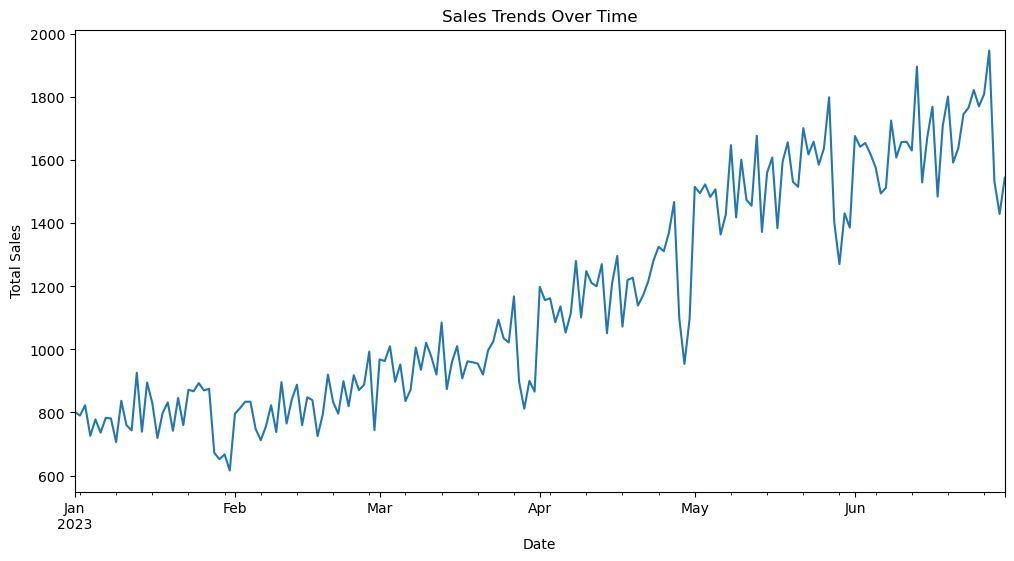

In [8]:
plt.figure(figsize=(12, 6))
df.groupby('transaction_date')['transaction_qty'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.savefig('sales_trend.png')
plt.show()

### Store Performance Analysis

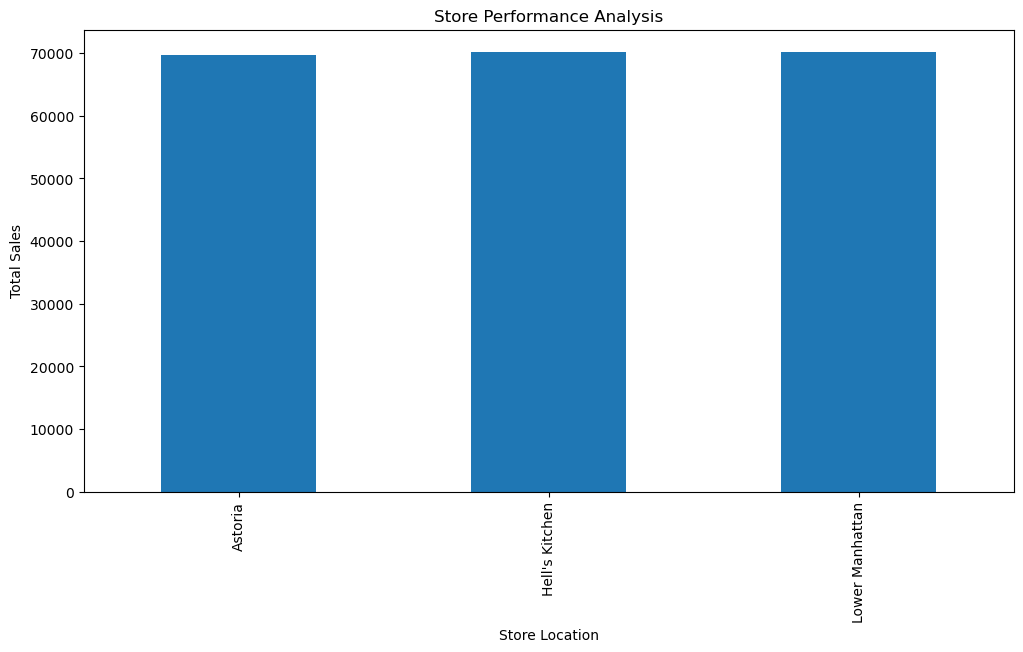

In [9]:
plt.figure(figsize=(12, 6))
df.groupby('store_location')['transaction_qty'].sum().sort_values().plot(kind='bar')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Store Performance Analysis')
plt.savefig('store_performance.png')
plt.show()

### Product Demand Insights

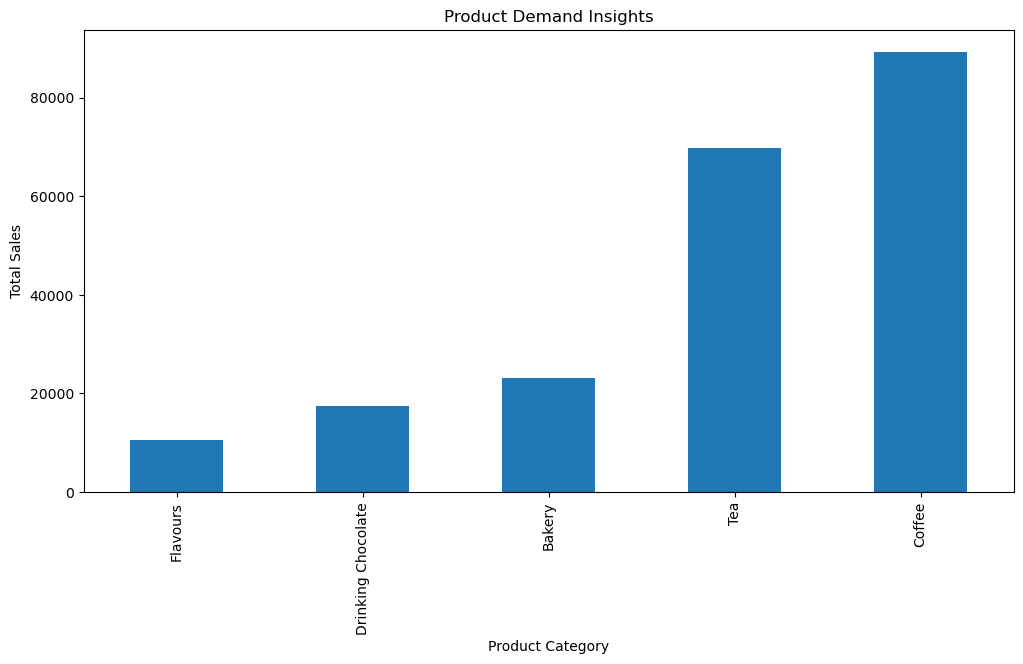

In [10]:
plt.figure(figsize=(12, 6))
df.groupby('product_category')['transaction_qty'].sum().sort_values().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Product Demand Insights')
plt.savefig('product_demand.png')
plt.show()

### Implementing ARIMA/SARIMA for Sales Forecasting
#### Check for Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(sales_data)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpretation
if result[1] < 0.05:
    print("The data is stationary (reject H0).")
else:
    print("The data is non-stationary (fail to reject H0), differencing is needed.")

ADF Statistic: 0.2091686534398088
p-value: 0.9727711726447806
The data is non-stationary (fail to reject H0), differencing is needed.


### Differencing 

In [14]:
sales_diff = sales_data.diff().dropna()

# Re-run ADF test after differencing
result_diff = adfuller(sales_diff)
print("ADF Statistic after differencing:", result_diff[0])
print("p-value after differencing:", result_diff[1])

ADF Statistic after differencing: -4.382596081148384
p-value after differencing: 0.000318606821206338


### Identify ARIMA Parameters

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


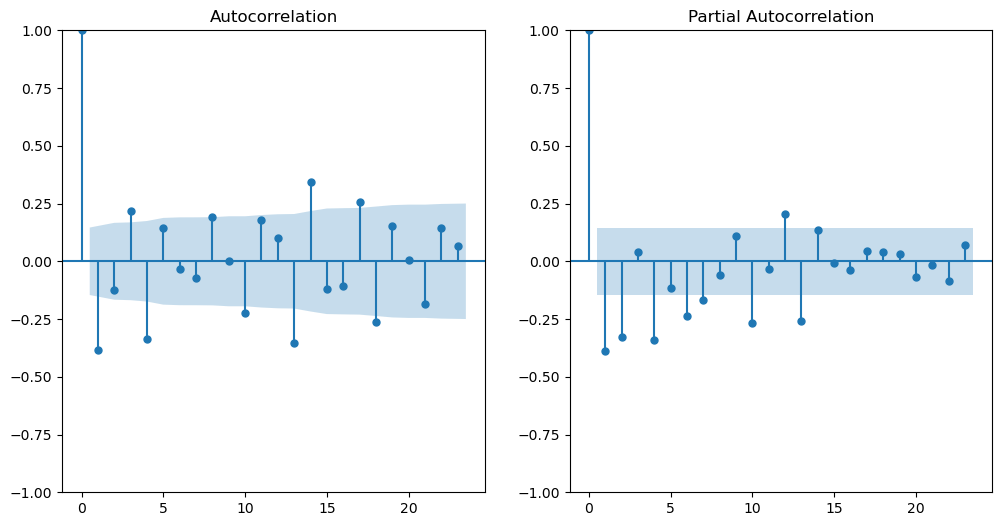

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sales_diff, ax=plt.gca())  # Helps identify q
plt.subplot(122)
plot_pacf(sales_diff, ax=plt.gca())  # Helps identify p
plt.show()

### Apply SARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


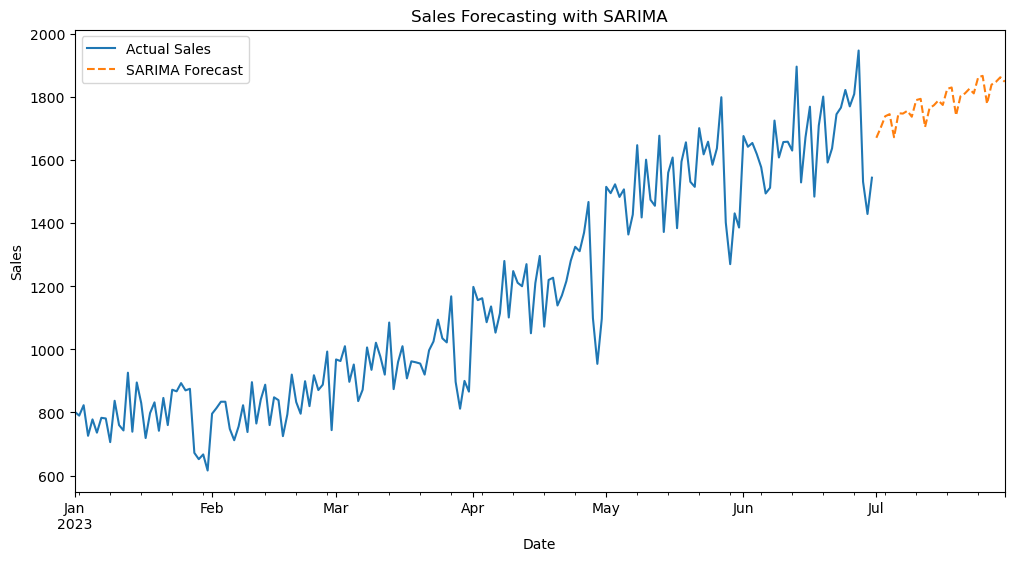

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (update seasonal order based on seasonality pattern)
model_sarima = SARIMAX(sales_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7))
sarima_result = model_sarima.fit()

# Forecast with SARIMA
forecast_sarima = sarima_result.forecast(steps=30)

# Create forecast dataframe
forecast_df_sarima = pd.DataFrame({'transaction_date': forecast_dates, 'forecast': forecast_sarima.values})
forecast_df_sarima.set_index('transaction_date', inplace=True)

# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
sales_data.plot(label="Actual Sales")
forecast_df_sarima['forecast'].plot(label="SARIMA Forecast", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Forecasting with SARIMA")
plt.savefig("sales_forecasting_sarima.png")
plt.show()

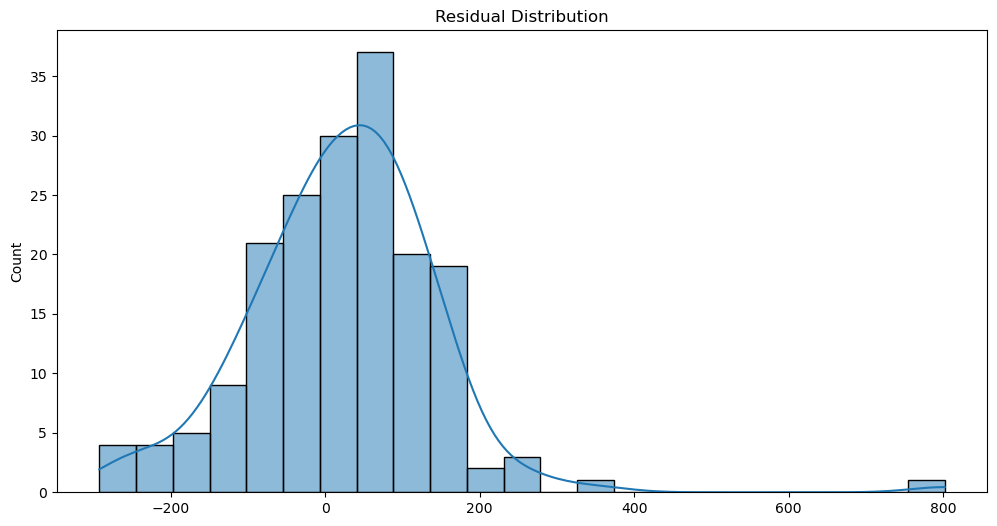

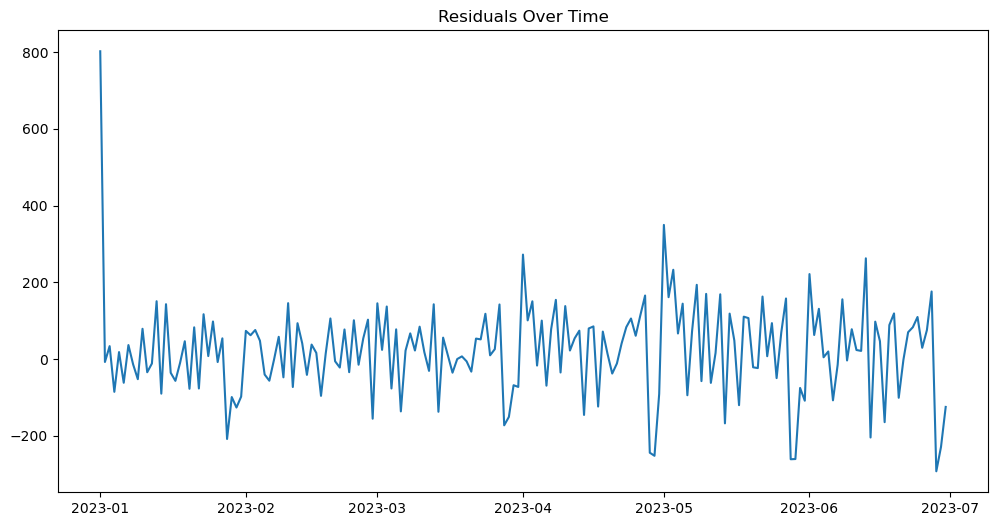

In [18]:
residuals = arima_result.resid
plt.figure(figsize=(12,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()

In [24]:
# Define the cleaned file name
cleaned_file_path = "Coffee_Shop_Sales_Cleaned.csv"

# Save the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully as: {cleaned_file_path}")

Cleaned dataset saved successfully as: Coffee_Shop_Sales_Cleaned.csv


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Ensure transaction_date is a datetime index
sales_data.index = pd.to_datetime(sales_data.index)

# Fit SARIMA model (adjust seasonal order based on detected seasonality)
model_sarima = SARIMAX(sales_data, 
                        order=(2, 1, 2),      # (p, d, q) - Non-seasonal parameters
                        seasonal_order=(1, 1, 1, 7),  # (P, D, Q, S) - Seasonal parameters
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

# Train the model
sarima_result = model_sarima.fit()

# Print model summary
print(sarima_result.summary())

# Forecast the next 30 days
forecast_sarima = sarima_result.forecast(steps=30)

# Create forecast dataframe
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df_sarima = pd.DataFrame({'transaction_date': forecast_dates, 'forecast': forecast_sarima.values})
forecast_df_sarima.set_index('transaction_date', inplace=True)

# Print the forecasted values
print("\n📈 SARIMA Seasonal Forecast (Next 30 Days):\n")
print(forecast_df_sarima)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                     transaction_qty   No. Observations:                  181
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -1005.669
Date:                             Wed, 12 Mar 2025   AIC                           2025.337
Time:                                     13:14:13   BIC                           2046.993
Sample:                                 01-01-2023   HQIC                          2034.129
                                      - 06-30-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5077      0.185     -2.751      0.006      -0.869      -0.146
ar.L2          0.0829      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
